# Sleep Health - Analysis 

Analysis Results - Here

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# Read the sleep health data from csv file and load it in a dataframe.
sleep_health = pd.read_csv("data\Sleep_health_and_lifestyle_dataset.csv")
sleep_health


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [11]:
# List of occupation and count
sleep_health['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [30]:
# Calculate average Sleep Duration for each occupation 
sleep_health_sleepduration = sleep_health.groupby(['Occupation'])['Sleep Duration'].mean()
#sleep_health_sleepduration.head()

# Converting the groupby object to a DataFrame
sleep_health_sleepduration_df = pd.DataFrame(sleep_health_sleepduration)

# Sorting the DataFrame in descending order of Sleep Duration
sleep_health_sleepduration_df.sort_values(['Sleep Duration'], ascending= False)

,Sleep Duration
Occupation,
Engineer,7.987302
Lawyer,7.410638
Accountant,7.113514
Nurse,7.063014
Doctor,6.970423
Manager,6.900000
Software Engineer,6.750000
Teacher,6.690000
Salesperson,6.403125


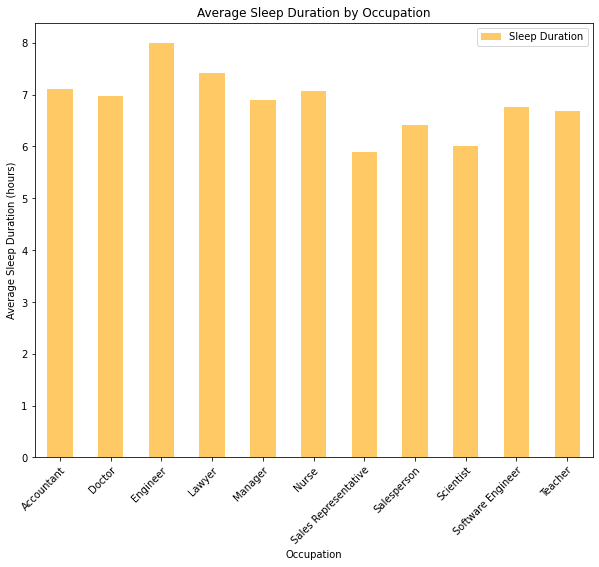

In [182]:
#  Plot Bar graph for the average Sleep Duration for each occupation
sleep_health_sleepduration_df.plot(kind = "bar",figsize= (10,8), color = "orange", alpha = 0.6)

# Set title, Y-label, X-label rotation
plt.title("Average Sleep Duration by Occupation")
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation = 45, rotation_mode="anchor", ha="right", wrap=True)

plt.show()


In [32]:
#  Calculate the average Quality of Sleep for each occupation
sleep_health_sleepquality = sleep_health.groupby(['Occupation'])['Quality of Sleep'].mean()
sleep_health_sleepquality.head()
sleep_health_sleepquality_df = pd.DataFrame(sleep_health_sleepquality)
sleep_health_sleepquality_df.sort_values(['Quality of Sleep'], ascending = False)

,Quality of Sleep
Occupation,
Engineer,8.412698
Lawyer,7.893617
Accountant,7.891892
Nurse,7.369863
Manager,7.000000
Teacher,6.975000
Doctor,6.647887
Software Engineer,6.500000
Salesperson,6.000000


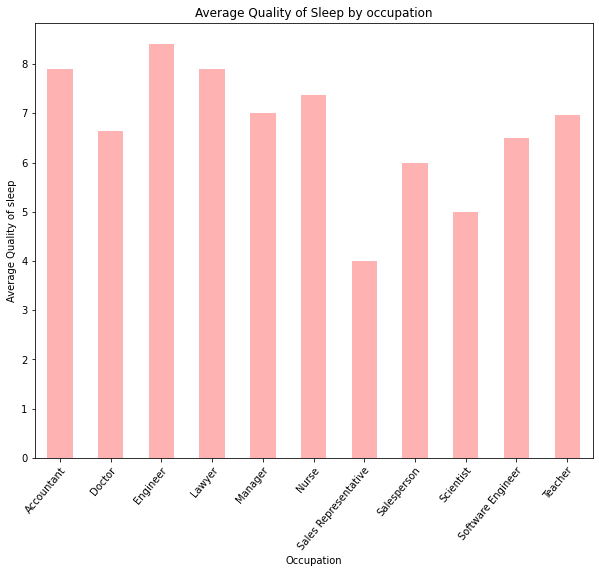

In [178]:
# Plot Bar graph for the average Quality of Slep for each occupation
sleep_health_sleepquality.plot(kind = "bar",figsize = (10,8), color = "red",alpha = 0.3,title = "Average Quality of Sleep by occupation")

# Set Y-label, X-label rotation
plt.ylabel ("Average Quality of Sleep")
plt.xticks(rotation = 50, rotation_mode="anchor", ha="right",  wrap = True)

# 
plt.show()

In [245]:
# Engineer - Sleep Disorder distribution
sleep_health_disorder_Eng = sleep_health.loc[sleep_health['Occupation'] == 'Engineer'].groupby(['Sleep Disorder'])['Sleep Disorder'].count()
print(f"Sleep Disorder distribution for Engineer:\n {sleep_health_disorder_Eng.head()}")

Sleep Disorder distribution for Engineer:
 Sleep Disorder
Insomnia        5
None           57
Sleep Apnea     1
Name: Sleep Disorder, dtype: int64


In [247]:
# Sales Representative - Sleep Disorder distribution
sleep_health_disorder_SRep = sleep_health.loc[sleep_health['Occupation'] == 'Sales Representative'].groupby(['Sleep Disorder'])['Sleep Disorder'].count()
print(f"Sleep Disorder distribution for Sales Representative:\n {sleep_health_disorder_SRep.head()}")

# Scientist - Sleep Disorder distribution
sleep_health_disorder_Scientist = sleep_health.loc[sleep_health['Occupation'] == 'Scientist'].groupby(['Sleep Disorder'])['Sleep Disorder'].count()
print(f"\nSleep Disorder distribution for Scientist:\n {sleep_health_disorder_Scientist.head()}")

# Salesperson - Sleep Disorder distribution
sleep_health_disorder_Salesperson = sleep_health.loc[sleep_health['Occupation'] == 'Salesperson'].groupby(['Sleep Disorder'])['Sleep Disorder'].count()
print(f"\nSleep Disorder distribution for Salesperson:\n {sleep_health_disorder_Salesperson.head()}")

Sleep Disorder distribution for Sales Representative:
 Sleep Disorder
Sleep Apnea    2
Name: Sleep Disorder, dtype: int64

Sleep Disorder distribution for Scientist:
 Sleep Disorder
None           2
Sleep Apnea    2
Name: Sleep Disorder, dtype: int64

Sleep Disorder distribution for Salesperson:
 Sleep Disorder
Insomnia       29
None            2
Sleep Apnea     1
Name: Sleep Disorder, dtype: int64


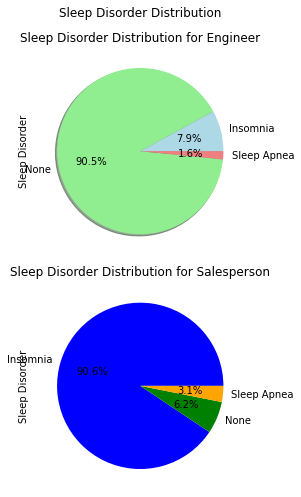

In [244]:
# Sub plots for Sleep Disorder Distribution - Engineer, Salesperson
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (20,20))
fig.suptitle('Sleep Disorder Distribution - Comparison')

# Set colors for the Pie chart
color_list1 = ['lightblue','lightgreen','lightcoral']
color_list2 = ["blue","green","orange"]

# Set the Pie chart attributes
sleep_health_disorder_Eng.plot(ax = ax1,kind = "pie",colors = color_list1, shadow = True,autopct = "%1.1f%%",  figsize = (7,7), title = "Sleep Disorder Distribution for Engineer")
sleep_health_disorder_Salesperson.plot(ax = ax2,kind = "pie", figsize=(7,7),autopct = "%1.1f%%",colors = color_list2, title = "Sleep Disorder Distribution for Salesperson")
fig.tight_layout()

plt.show()

In [185]:
# Sleep Disorder distribution by Occupation
sleep_health_disorder = sleep_health.groupby(['Occupation','Sleep Disorder'])['Person ID'].count()
sleep_health_disorder_df = pd.DataFrame(sleep_health_disorder)
sleep_health_disorder_df

Person ID
Occupation           Sleep Disorder           
Accountant           Insomnia                7
                     None                   30
Doctor               Insomnia                3
                     None                   64
                     Sleep Apnea             4
Engineer             Insomnia                5
                     None                   57
                     Sleep Apnea             1
Lawyer               Insomnia                2
                     None                   42
                     Sleep Apnea             3
Manager              None                    1
Nurse                Insomnia                3
                     None                    9
                     Sleep Apnea            61
Sales Representative Sleep Apnea             2
Salesperson          Insomnia               29
                     None                    2
                     Sleep Apnea             1
Scientist            None                    2
                     Sleep Apnea             2
Software Engineer    Insomnia                1
                     None                    3
Teacher              Insomnia               27
                     None                    9
                     Sleep Apnea             4